
## SHAP (SHapley Additive exPlanations)

* Case: An AI model makes unjust decision on the basis of a bias
* Laws like EU law is seeking to pass legislation requiring AI systems to meet certain transparency requirements
* Human beings must be able to audit decisions made by a model in order to determine what factors lead to a given prediction
* Some models are interpretable such as: Linear Regression, Logistic Regression, Naive Bayes, Decision Trees and other tree based models



In [1]:

## !pip install shap
## !pip install datasets
## !pip install transformers
## !pip install -U datasets
## !pip install scikit-learn
## !pip install xgboost
## !pip install matplotlib



## Linear Models

* The coefficients can be interpreted as a  type of feature explanation
* Boston focuses on features of air quality that may have affected the median prices in the 1970s housing market of the Boston Standard Metropolitan Statistical Area. It had a bias issue, however.
* A  housing price affected by air quality, for example, can be affected by the feature of air pollution; more pollution would intuitively reduce the price of a house, all other parameters remaining fixed. 
* It appears reasonable, under this assumption, that one could analyze multiple features of air pollution to see how prices change as each component of pollution changes.
*  questions come in when other variables are presented as “standard” to a model like this, outside of the scope of the intended analysis.
* Study by Harrison and Rubinfeld
* demographics, CRIM: Crime rate by town. (FBI (1970))


/Users/user/opt/anaconda3/envs/py37_Transfer_Learning/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets i

<BarContainer object of 13 artists>

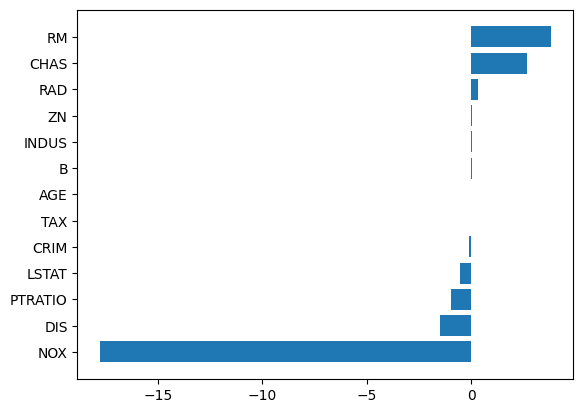

In [3]:

from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

boston = load_boston()

X = boston.data
y = boston.target

lr = LinearRegression()
lr.fit(X, y)

## We plot the weights associated with each feature

sorted_idx = lr.coef_.argsort()
plt.barh(boston.feature_names[sorted_idx], lr.coef_[sorted_idx])



* Looking at the bar chart,  a small change in the nitric oxides concentration (NOX) produces the largest change (negative) in the price of a house relative to all other features. 
* However, in reality the coefficient is larger than the rest because of the nature of the data. 



<BarContainer object of 13 artists>

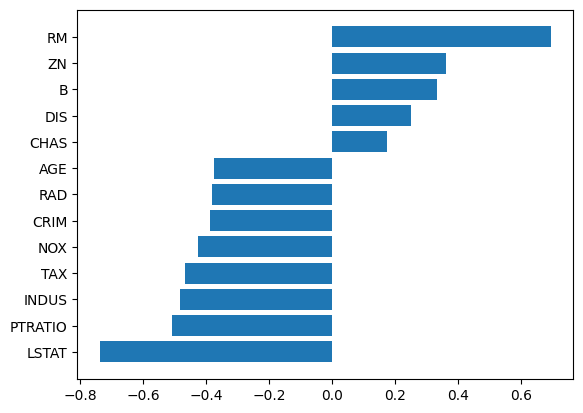

In [4]:

from sklearn.feature_selection import r_regression
result = r_regression(X, y)
sorted_idx = result.argsort()

plt.barh(boston.feature_names[sorted_idx], result[sorted_idx])



* As we can see, the LSTAT feature has the largest influence on the house price.



## XGBoost


In [5]:

from xgboost import XGBRegressor
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

boston = load_boston()

X = boston.data
y = boston.target


/Users/user/opt/anaconda3/envs/py37_Transfer_Learning/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets i

In [6]:

model = XGBRegressor()
model.fit(X, y)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

<BarContainer object of 13 artists>

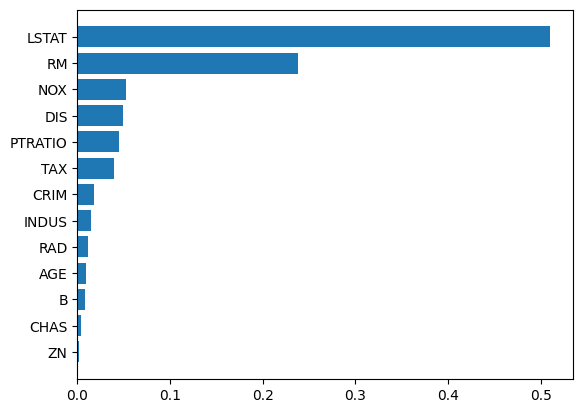

In [7]:

sorted_idx = model.feature_importances_.argsort()
plt.barh(boston.feature_names[sorted_idx], model.feature_importances_[sorted_idx])



* As we can see, the percentage of lower class people (LSTAT) in the area had the greatest impact on the model’s prediction.



## SHAP

*  Shapley values were named in honour of Lloyd Shapley, who introduced the concept in 1951 and went on to win the Nobel Memorial Prize in Economic Sciences in 2012
* SHapley Additive exPlanations is a "game theoretic" method to explain the output of AI models
* The Shapley value is a game theory concept that measures the contribution of each player to a final outcome. It is used in machine learning to explain how features impact a model's predictions
* In game theory, the Shapley value is a way to fairly distribute gains and costs among players in a group. 
* It's used when players work together to achieve a goal, but their contributions are not equal. 
* In machine learning, Shapley values are used to explain how each feature contributes to a model's output. They show how features affect predictions, how important each feature is compared to others, and how much the model relies on feature interactions




## Game Theory and Cooperative Game Theory

* Game theory is a theoretical framework for social interactions with competing actors. 
* It's the study of optimum decision-making by independent and competing agents in a strategic context. 
* A "game" is any scenario in which there are many decision makers, each of whom seeks to maximize their outcomes
* The optimal choice will be influenced by the decisions of others
* The game determines the participants' identities, preferences, and possible tactics, as well as how these strategies influence the result
* In the same context, cooperative game theory (a branch of game theory) posits that coalitions of players are the main units of decision-making and may compel cooperative conduct
* As a result, cooperative games may be seen as a competition between a coalition of players rather than between individual players
* So the goal is to develop a "formula" for measuring each player's contribution to the game, this formula is the Shapley value






## Shapley Values: Intuition

* The scenario is as follows: a coalition of players collaborates in order to achieve a specific total benefit as a result of their collaboration
* Given that certain players may make more contributions to the coalition than others and that various players may have varying levels of leverage or efficiency, what ultimate distribution of profit among players should result in any given game? 
* In other words, we want to know how essential each participant is to the total collaboration, and what kind of reward can he or she anticipate as a result? 
* One potential solution to this issue is provided by the Shapley coefficient values
* So within the machine learning context, the feature values of a data instance serve as coalition members
* Shapley values will then tell us know how to divide the "payout" among the features in a fair manner, which is the prediction
* A player may be a single feature value, as in tabular data
* A player may alternatively be defined as a set of feature values



In [8]:

import shap


In [9]:

explainer   = shap.Explainer(model)   ## explain xgboost model
shap_values = explainer(X)


In [10]:

shap_values.shape


(506, 13)

In [11]:

boston.feature_names


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [12]:

for i, val in enumerate(boston.feature_names):
    print(i, "...", val)


0 ... CRIM
1 ... ZN
2 ... INDUS
3 ... CHAS
4 ... NOX
5 ... RM
6 ... AGE
7 ... DIS
8 ... RAD
9 ... TAX
10 ... PTRATIO
11 ... B
12 ... LSTAT


In [13]:

X.shape


(506, 13)


* Features with large absolute Shapley values are considered important. 
* Since we want to obtain the global importance, we average the absolute Shapley values per feature across the entire dataset. 



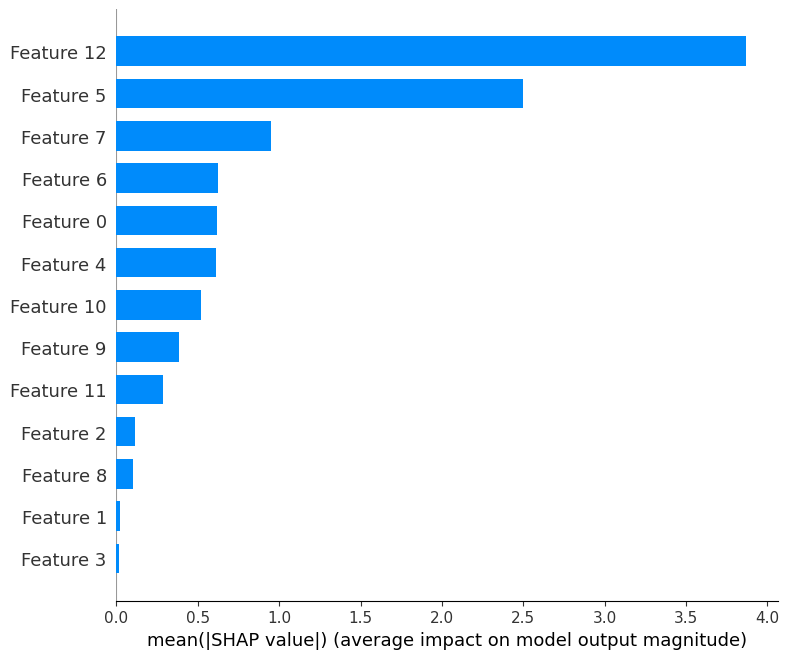

In [14]:

## shap_values.display_data = shap.datasets.adult(display=True)[0].values
shap.summary_plot(shap_values, X, plot_type="bar")


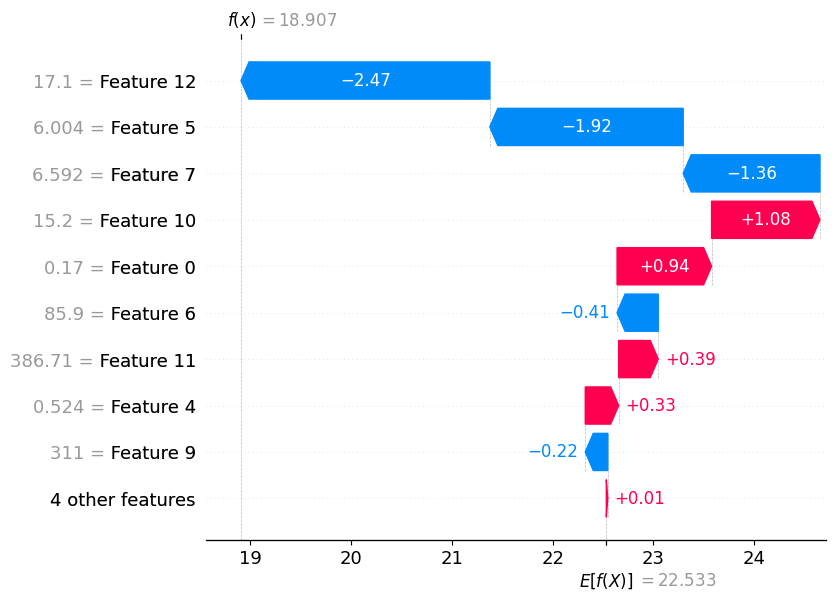

In [15]:

shap.plots.waterfall( shap_values[9] )   ## try 3, 8, 7, etc



* Blue means that the feature value lead the model to decrease its prediction 
* Red  means that the feature value lead the model to increase its prediction
* Helps to see what the features are doing to give a single prediction



## To understand the importance or contribution of the features for the whole dataset




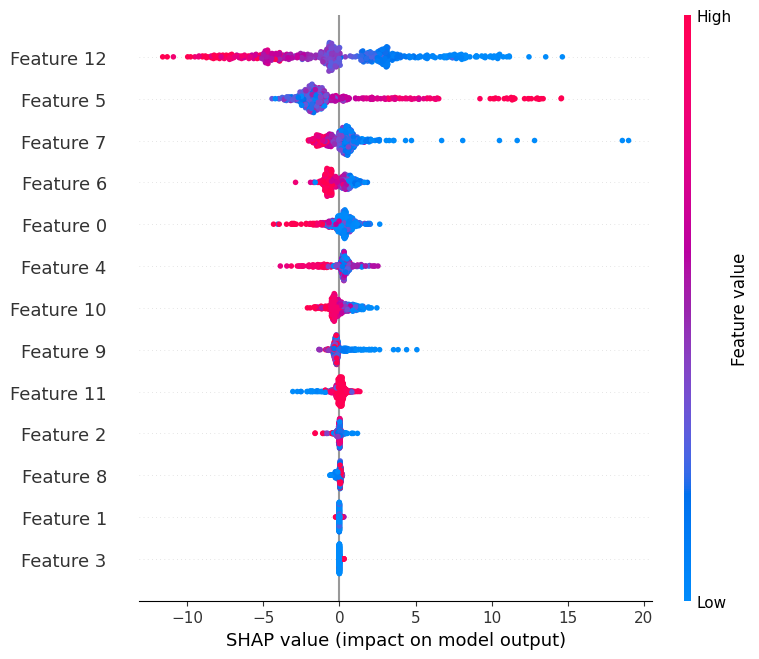

In [16]:

shap.summary_plot(shap_values, X)



## Another Example


In [17]:

import sklearn

import shap

# a classic housing price dataset
X, y = shap.datasets.california(n_points=1000)

X100 = shap.utils.sample(X, 100)  # 100 instances for use as the background distribution

# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)


LinearRegression()


* One of the simplest model types is standard linear regression
* We train a linear regression model on the California housing dataset. 
* This dataset consists of 20,640 blocks of houses across California in 1990
* Goal is to predict the median home price from 8 different features

MedInc - median income in block group

HouseAge - median house age in block group

AveRooms - average number of rooms per household

AveBedrms - average number of bedrooms per household

Population - block group population

AveOccup - average number of household members

Latitude - block group latitude

Longitude - block group longitude



* The most common way of understanding a linear model is to examine the weights learned for each feature



In [18]:

print("Model weights:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))


Model weights:

MedInc = 0.42563
HouseAge = 0.01033
AveRooms = -0.1161
AveBedrms = 0.66385
Population = 3e-05
AveOccup = -0.26096
Latitude = -0.46734
Longitude = -0.46272



## NLP


In [19]:


import datasets
import numpy as np
import scipy as sp
import torch
import transformers


In [20]:

from transformers import (AutoTokenizer, 
                          AutoModelForSequenceClassification, 
                          TextClassificationPipeline)


In [22]:

tokenizer_name = "distilbert-base-uncased"
model_name     = "distilbert-base-uncased-finetuned-sst-2-english"

tokenizer = transformers.DistilBertTokenizerFast.from_pretrained(tokenizer_name)
model     = transformers.DistilBertForSequenceClassification.from_pretrained(model_name).cpu()

pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer, return_all_scores=True)


In [23]:

def score_and_visualize(text):
  prediction = pipe([text])
  print(prediction[0])

  explainer = shap.Explainer(pipe)
  shap_values = explainer([text])

  shap.plots.text(shap_values)


In [24]:

score_and_visualize('After many years of training, I finally succeeded in achieving '
                    'my black belt in machine learning. The road was very rough but '
                    'I could not be more happy with the result!')


[{'label': 'NEGATIVE', 'score': 0.0052384864538908005}, {'label': 'POSITIVE', 'score': 0.9947615265846252}]


  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 2it [00:48, 48.76s/it]                                             



## BERTs as metrics and Toxicity


In [25]:

import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification


In [26]:

tokenizer = RobertaTokenizer.from_pretrained('s-nlp/roberta_toxicity_classifier')
model     = RobertaForSequenceClassification.from_pretrained('s-nlp/roberta_toxicity_classifier')


Some weights of the model checkpoint at s-nlp/roberta_toxicity_classifier were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [27]:

text1 = "this is a very rewarding experience"


In [28]:

batch = tokenizer.encode(text1, return_tensors="pt")

output = model(batch)

print( output )


SequenceClassifierOutput(loss=None, logits=tensor([[ 4.9272, -5.2819]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)


In [29]:

text2 = "this person is the worst and so corrupt"


In [30]:

batch = tokenizer.encode(text2, return_tensors="pt")

output = model(batch)

print( output )


SequenceClassifierOutput(loss=None, logits=tensor([[-3.5005,  3.3557]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)



## Disparity Ratio


In [35]:

import pandas as pd

# Mock predictions
data = pd.DataFrame({
    'gender': ['en', 'fr', 'en', 'fr', 'fr', 'en'],
    'approved': [1, 0, 1, 0, 1, 1]
})

# Group rates
rate_en = data[data.gender == 'en']['approved'].mean()
rate_fr = data[data.gender == 'fr']['approved'].mean()

# Disparity ratio (fr vs en)
ratio = rate_fr / rate_en
print(f"Approval rate (fr/en): {ratio:.2f}")


Approval rate (fr/en): 0.33



## NIO


In [39]:

import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple model (already trained)
model = nn.Sequential(nn.Linear(3, 1))
model.eval()

# Freeze model weights so only x_opt is optimized
for param in model.parameters():
    param.requires_grad = False

# Target output
y_target = torch.tensor([[0.8]])

# Input to be optimized
x_opt = torch.randn((1, 3), requires_grad=True)

# Optimizer for x only
optimizer = optim.Adam([x_opt], lr=0.1)

# Optimization loop
for step in range(200):
    optimizer.zero_grad()
    y_pred = model(x_opt)
    loss = (y_pred - y_target).pow(2).mean()
    
    # Optional soft constraint (input range penalty)
    loss = loss + 0.01 * torch.clamp(x_opt, -2, 2).pow(2).sum()
    
    loss.backward()
    optimizer.step()

# Final result
print("Optimized input:\n", x_opt.detach())



Optimized input:
 tensor([[ 0.0137,  4.0427, -0.0424]])
